## Animation Examples from Matplotlib
https://matplotlib.org/gallery/index.html#animation

<p> <b>First</b> download the Jupyter notebook for the Decay example from the gallery and run it.
<p> There are a variety of "How To's", here is <a href="https://brushingupscience.com/2016/06/21/matplotlib-animations-the-easy-way/">one</a> and here is another <a href="https://jakevdp.github.io/blog/2012/08/18/matplotlib-animation-tutorial/">one</a>

### Video example
Next we will modify the provided decay code to create an interactive video

In [16]:
#Get the decay code from the matplotlib animation gallery
%matplotlib inline

After the animated decay example, we will look at

## Animated Histogram example

<IPython.core.display.Javascript object>


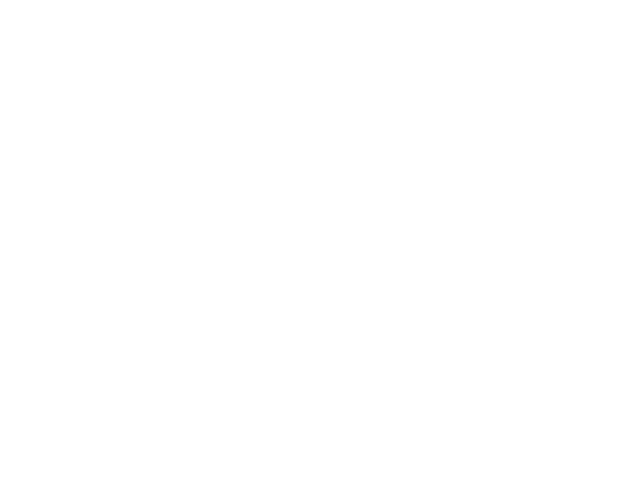

Traceback (most recent call last):
  File "/home/dalton/.local/lib/python3.6/site-packages/matplotlib/cbook/__init__.py", line 196, in process
    func(*args, **kwargs)
  File "/home/dalton/.local/lib/python3.6/site-packages/matplotlib/animation.py", line 1467, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


In [4]:
"""
==================
Animated histogram
==================

Use a path patch to draw a bunch of rectangles for an animated histogram.
"""

import numpy as np

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.path as path
import matplotlib.animation as animation
%matplotlib notebook

# Fixing random state for reproducibility
np.random.seed(19680801)

# histogram our data with numpy
data = np.random.randn(1000)
n, bins = np.histogram(data, 100)

# get the corners of the rectangles for the histogram
left = np.array(bins[:-1])
right = np.array(bins[1:])
bottom = np.zeros(len(left))
top = bottom + n
nrects = len(left)

###############################################################################
# Here comes the tricky part -- we have to set up the vertex and path codes
# arrays using ``plt.Path.MOVETO``, ``plt.Path.LINETO`` and
# ``plt.Path.CLOSEPOLY`` for each rect.
#
# * We need 1 ``MOVETO`` per rectangle, which sets the initial point.
# * We need 3 ``LINETO``'s, which tell Matplotlib to draw lines from
#   vertex 1 to vertex 2, v2 to v3, and v3 to v4.
# * We then need one ``CLOSEPOLY`` which tells Matplotlib to draw a line from
#   the v4 to our initial vertex (the ``MOVETO`` vertex), in order to close the
#   polygon.
#
# .. note::
#
#   The vertex for ``CLOSEPOLY`` is ignored, but we still need a placeholder
#   in the ``verts`` array to keep the codes aligned with the vertices.
nverts = nrects * (1 + 3 + 1)
verts = np.zeros((nverts, 2))
codes = np.ones(nverts, int) * path.Path.LINETO
codes[0::5] = path.Path.MOVETO
codes[4::5] = path.Path.CLOSEPOLY
verts[0::5, 0] = left
verts[0::5, 1] = bottom
verts[1::5, 0] = left
verts[1::5, 1] = top
verts[2::5, 0] = right
verts[2::5, 1] = top
verts[3::5, 0] = right
verts[3::5, 1] = bottom

###############################################################################
# To animate the histogram, we need an ``animate`` function, which generates
# a random set of numbers and updates the locations of the vertices for the
# histogram (in this case, only the heights of each rectangle). ``patch`` will
# eventually be a ``Patch`` object.
patch = None


def animate(i):
    # simulate new data coming in
    data = np.random.randn(1000)
    n, bins = np.histogram(data, 100)
    top = bottom + n
    verts[1::5, 1] = top
    verts[2::5, 1] = top
    return [patch, ]

###############################################################################
# And now we build the `Path` and `Patch` instances for the histogram using
# our vertices and codes. We add the patch to the `Axes` instance, and setup
# the `FuncAnimation` with our animate function.
fig, ax = plt.subplots()
barpath = path.Path(verts, codes)
patch = patches.PathPatch(
    barpath, facecolor='green', edgecolor='yellow', alpha=0.5)
ax.add_patch(patch)

ax.set_xlim(left[0], right[-1])
ax.set_ylim(bottom.min(), top.max())

ani = animation.FuncAnimation(fig, animate, 20, repeat=False, blit=True)
plt.show()


### Add text to the plot with the current iteration

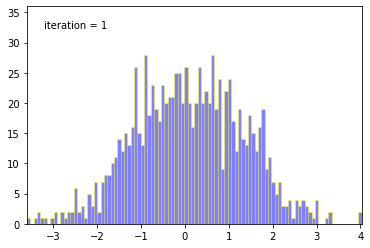

In [6]:
###############################################################################
# To animate the histogram, we need an ``animate`` function, which generates
# a random set of numbers and updates the locations of the vertices for the
# histogram (in this case, only the heights of each rectangle). ``patch`` will
# eventually be a ``Patch`` object.
patch = None

# **Add a line to update the text in the figure**
def animate(i):
    # simulate new data coming in
    data = np.random.randn(1000)
    n, bins = np.histogram(data, 100)
    top = bottom + n
    verts[1::5, 1] = top
    verts[2::5, 1] = top
    iteration_text.set_text(iteration_template % (i+1))
    return [patch, iteration_text] 

###############################################################################
# And now we build the `Path` and `Patch` instances for the histogram using
# our vertices and codes. We add the patch to the `Axes` instance, and setup
# the `FuncAnimation` with our animate function.
fig, ax = plt.subplots()
barpath = path.Path(verts, codes)
patch = patches.PathPatch(
    barpath, facecolor='blue', edgecolor='yellow', alpha=0.5)
ax.add_patch(patch)

#Initialize a string template and set text location to upper left
iteration_template = 'iteration = %i'
iteration_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)

ax.set_xlim(left[0], right[-1])
ax.set_ylim(bottom.min(), top.max())

ani = animation.FuncAnimation(fig, animate, 40, repeat=False, blit=True)
plt.show()


### Using real data
The provided example above shows random data. What if we want to use real data?
Let's look at some Consumer Expenditure data for years 2000 - 2017

In [8]:
#Use the consumer expenditure data
import pandas as pd
df = pd.read_excel("https://katie.mtech.edu/classes/csci444/python/data/ce00-17.xls", 
                   sheet_name="multiyr2000-17")

#Make a list of the years
years = list(df)[1:]
df = df[:169]
items = df['Item'] #Create a list of items

items[26:49]

HTTPError: HTTP Error 404: Not Found

In [9]:
#create a static bar graph for 2001
meat=df[30:36][2001]
fig, ax = plt.subplots(figsize=(8, 4))
ax.set(xlabel='Item', ylabel='Amount $', title='Meat Expenditures')
ax.bar(items[30:36], meat)

NameError: name 'df' is not defined

### Now create an animation for all years
First use a line since it is simpler

NameError: name 'df' is not defined

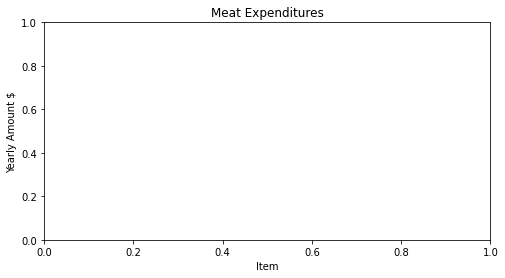

In [10]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.set(xlabel='Item', ylabel='Yearly Amount $', title='Meat Expenditures')
meat=df[30:36][2000]

#Note that ax.plot returns a list containing one line, so select it with [0] 
line = ax.plot(items[30:36],df[30:36][2000])[0]

#Initialize a string template and text location to upper right
year_template = 'year = %i'
year_text = ax.text(0.85, 0.9, '', transform=ax.transAxes)

#optional function
def init():
    year_text.set_text(year_template % (2000))
    return year_text

def animate(i):
    meat=df[30:36][i+2000]
    line.set_ydata(meat)
    year_text.set_text(year_template % (i+2000))
    return line, year_text
    
# Construct the animation, using the update function as the animation director.
ani = animation.FuncAnimation(fig, animate, init_func=init, frames = 18, interval=500)
plt.show()

### Animate with Bars
Note jupyter did not provide any error messages, so I coded this in IDLE first

NameError: name 'df' is not defined

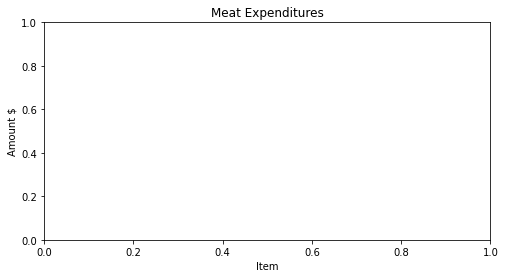

In [11]:
#create a static bar graph for 2000
[fig, ax] = plt.subplots(figsize=(8, 4))
ax.set(xlabel='Item', ylabel='Amount $', title='Meat Expenditures')
meat=df[30:36][2000]
bars = ax.bar(items[30:36],meat)

#Initialize a string template and text location to upper right
year_template = 'year = %i'
year_text = ax.text(0.85, 0.9, '', transform=ax.transAxes)

def animate(i):
    #get the values for the current year
    meat=list(df[30:36][i+2000])

    #bars contains 6 rectangles, need to adjust the height of each one
    k=0
    for bar in bars:
        bar.set_height(meat[k])
        k += 1

    #set the display text
    year_text.set_text(year_template % (i+2000))
    return bars, year_text
    
# Construct the animation, using the update function as the animation director.
ani = animation.FuncAnimation(fig, animate, frames = 18, interval=200)
plt.show()


In [12]:
#Two ways to create a mpeg
ani.save("CEbars.mp4")

# from matplotlib.animation import FFMpegWriter
# writer = FFMpegWriter(fps=2, metadata=dict(artist='Me'), bitrate=1800)
# ani.save("CEbars2.mp4", writer=writer)


TypeError: 'MovieWriterRegistry' object is not an iterator

## 2D data animations
One animation technique is to simple pause between frames. This is not recommended for more demanding applications.

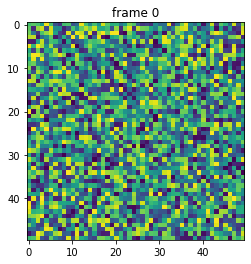

In [18]:
np.random.seed(19680801)
data = np.random.random((50, 50, 50))

fig, ax = plt.subplots()

for i in range(len(data)):
    ax.cla()
    ax.imshow(data[i])
    ax.set_title("frame {}".format(i))
    # Note that using time.sleep does *not* work here!
    plt.pause(0.1)

#only last frame is displayed in notebook, use qt5 for animation.
#%matplotlib qt5


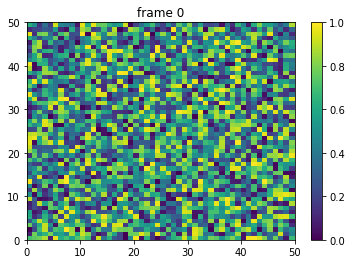

In [19]:
#The same data plotted with FuncAnimation
fig, ax = plt.subplots()
x = np.linspace(0, 50, 51)
y = np.linspace(0, 50, 51)
cax = ax.pcolormesh(x, y, data[:, :, 0],vmin=0, vmax=1)
fig.colorbar(cax)
frame_template = 'frame %i'

def animate(i):
    ax.set_title(frame_template % (i))
    cax.set_array(data[:, :, i].flatten())
        
anim = animation.FuncAnimation(fig, animate, interval=200, frames=50)

plt.show()

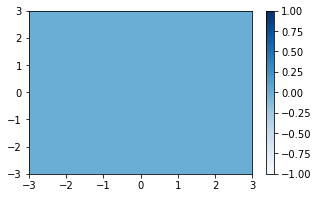

In [20]:
#An example from the Matplotlib Animations the Easy Way
fig, ax = plt.subplots(figsize=(5, 3))
ax.set(xlim=(-3, 3), ylim=(-3, 3))

#Generate 3 dimensional data
x = np.linspace(-3, 3, 91)
t = np.linspace(0, 25, 30)
y = np.linspace(-3, 3, 91)
X3, Y3, T3 = np.meshgrid(x, y, t)
sinT3 = np.sin(2*np.pi*T3 /
               T3.max(axis=2)[..., np.newaxis])
G = (X3**2 + Y3**2)*sinT3

cax = ax.pcolormesh(x, y, G[:-1, :-1, 0],
                    vmin=-1, vmax=1, cmap='Blues')
fig.colorbar(cax)
 
def animate(i):
     cax.set_array(G[:-1, :-1, i].flatten())

anim = animation.FuncAnimation(
    fig, animate, interval=200, frames=len(t)-1)
 
plt.show()